In [176]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')

file_path = 'imdb_data.csv'

try:
    imdb_df = pd.read_csv(file_path)
    print("DataFrame loaded successfully!")
    # Now you can access attributes like dtypes
    print(imdb_df.dtypes)
except FileNotFoundError:
    print(f"File '{file_path}' not found!")
except Exception as e:
    print("An error occurred:", e)
imdb_df.head(35)

DataFrame loaded successfully!
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult            float64
startYear           object
endYear             object
runtimeMinutes      object
genres              object
averageRating      float64
numVotes           float64
title               object
region              object
types               object
attributes          object
isOriginalTitle    float64
dtype: object


[nltk_data] Downloading package punkt to /Users/fibu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/fibu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,title,region,types,attributes,isOriginalTitle
0,tt13234124,tvEpisode,Episode #1.637,Episode #1.637,0.0,\N,\N,44,Talk-Show,NaN,NaN,Episode #1.637,\N,original,\N,1.0
1,tt2544732,tvEpisode,Into the Ring,Into the Ring,0.0,1983,\N,\N,"Drama,Romance",NaN,NaN,Into the Ring,\N,original,\N,1.0
2,tt10794650,tvEpisode,Les Îles Éoliennes,Les Îles Éoliennes,0.0,2000,\N,43,Documentary,NaN,NaN,Les Îles Éoliennes,\N,original,\N,1.0
3,tt7213960,tvSeries,Who Do You Think You Are?,Who Do You Think You Are?,0.0,2009,2010,50,"Biography,Documentary,History",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt2442208,tvEpisode,One Mission,One Mission,0.0,2012,\N,41,"Action,Reality-TV,Sport",8.4,9.0,One Mission,\N,original,\N,1.0
5,tt15545134,tvEpisode,Outdoor - Spontan besamt,Outdoor - Spontan besamt,1.0,2016,\N,\N,Adult,NaN,NaN,Outdoor - Spontan besamt,\N,original,\N,1.0
6,tt28490851,tvEpisode,Episode #1.1004,Episode #1.1004,0.0,2023,\N,\N,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,tt23832300,tvEpisode,Tyson Fury vs. Wladimir Klitschko II,Tyson Fury vs. Wladimir Klitschko II,0.0,2016,\N,17,Sport,NaN,NaN,Tyson Fury vs. Wladimir Klitschko II,\N,original,\N,1.0
8,tt28243623,movie,Breakout 2: The Party,Breakout 2: The Party,0.0,2023,\N,111,Crime,NaN,NaN,Breakout 2: The Party,\N,original,\N,1.0
9,tt20231372,tvEpisode,Treasure Map,Treasure Map,0.0,2022,\N,\N,"Comedy,Drama,Family",7.1,7.0,Treasure Map,\N,original,\N,1.0


In [177]:
# Check the data types of all columns
print(imdb_df.dtypes)

tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult            float64
startYear           object
endYear             object
runtimeMinutes      object
genres              object
averageRating      float64
numVotes           float64
title               object
region              object
types               object
attributes          object
isOriginalTitle    float64
dtype: object


In [178]:
# Remove unnecessary columns
imdb_df = imdb_df.drop(columns=['tconst', 'title', 'region', 'attributes', 'types'])

# Handle null values
imdb_df = imdb_df.replace('\\N', np.nan)
imdb_df = imdb_df.fillna(np.nan)
imdb_df['genres'] = imdb_df['genres'].fillna('unknown')

imdb_df['genres'] = imdb_df['genres'].fillna('unknown')
imdb_df['averageRating'] = imdb_df['averageRating'].fillna(0)
imdb_df['numVotes'] = imdb_df['numVotes'].fillna(0)
imdb_df['runtimeMinutes'] = imdb_df['runtimeMinutes'].fillna(0)
imdb_df['isOriginalTitle'] = imdb_df['isOriginalTitle'].fillna(0)
imdb_df['startYear'] = imdb_df['startYear'].fillna(0)
imdb_df['endYear'] = imdb_df['endYear'].fillna(0)

# Fill missing values in 'primaryTitle' column with an empty string
imdb_df['primaryTitle'] = imdb_df['primaryTitle'].fillna('')


# Convert columns to appropriate data types
imdb_df['startYear'] = pd.to_numeric(imdb_df['startYear'], errors='coerce')
imdb_df['endYear'] = pd.to_numeric(imdb_df['endYear'], errors='coerce')
imdb_df['runtimeMinutes'] = pd.to_numeric(imdb_df['runtimeMinutes'], errors='coerce')

# Print the head of the cleaned dataset
print("Head of the cleaned IMDb dataset:")
imdb_df.head(35)

Head of the cleaned IMDb dataset:


,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,isOriginalTitle
0,tvEpisode,Episode #1.637,Episode #1.637,0.0,0,0,44.0,Talk-Show,0.0,0.0,1.0
1,tvEpisode,Into the Ring,Into the Ring,0.0,1983,0,0.0,"Drama,Romance",0.0,0.0,1.0
2,tvEpisode,Les Îles Éoliennes,Les Îles Éoliennes,0.0,2000,0,43.0,Documentary,0.0,0.0,1.0
3,tvSeries,Who Do You Think You Are?,Who Do You Think You Are?,0.0,2009,2010,50.0,"Biography,Documentary,History",0.0,0.0,0.0
4,tvEpisode,One Mission,One Mission,0.0,2012,0,41.0,"Action,Reality-TV,Sport",8.4,9.0,1.0
5,tvEpisode,Outdoor - Spontan besamt,Outdoor - Spontan besamt,1.0,2016,0,0.0,Adult,0.0,0.0,1.0
6,tvEpisode,Episode #1.1004,Episode #1.1004,0.0,2023,0,0.0,Drama,0.0,0.0,0.0
7,tvEpisode,Tyson Fury vs. Wladimir Klitschko II,Tyson Fury vs. Wladimir Klitschko II,0.0,2016,0,17.0,Sport,0.0,0.0,1.0
8,movie,Breakout 2: The Party,Breakout 2: The Party,0.0,2023,0,111.0,Crime,0.0,0.0,1.0
9,tvEpisode,Treasure Map,Treasure Map,0.0,2022,0,0.0,"Comedy,Drama,Family",7.1,7.0,1.0


In [179]:
# Feature engineering
imdb_df['titleLength'] = imdb_df['primaryTitle'].apply(len)
imdb_df['genreCount'] = imdb_df['genres'].apply(lambda x: len(str(x).split(',')))

# Text preprocessing
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# def preprocess_text(text):
#     text = re.sub(r'[^\w\s]', '', str(text).lower().strip())  # Remove punctuation and convert to lowercase
#     tokens = word_tokenize(text)  # Tokenization
#     tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
#     tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
#     return " ".join(tokens)

# imdb_df['cleaned_title'] = imdb_df['primaryTitle'].apply(preprocess_text)

# One-hot encoding for categorical variables
imdb_df = pd.get_dummies(imdb_df, columns=['titleType'])

# Drop columns that don't have relevance
imdb_df = imdb_df.drop(['primaryTitle', 'originalTitle', 'titleType_tvSeries'], axis=1)

# Convert the 'genres' column to numeric
genres_split = imdb_df['genres'].str.split(',', expand=True)

# Rename the resulting columns to 'genre1', 'genre2', 'genre3'
genres_split.columns = ['genre1', 'genre2', 'genre3']

# Concatenate the original DataFrame with the new genre columns
imdb_df = pd.concat([imdb_df, genres_split], axis=1)

# Optionally, you can drop the original 'genres' column if you no longer need it
imdb_df = imdb_df.drop(columns=['genres'])


# imdb_df['genres'] = imdb_df['genres'].astype('category')
# imdb_df['genres'] = imdb_df['genres'].cat.codes

# Convert 'runtimeMinutes' to float
imdb_df['runtimeMinutes'] = imdb_df['runtimeMinutes'].astype(float)
imdb_df['startYear'] = imdb_df['startYear'].astype(float)
imdb_df['endYear'] = imdb_df['endYear'].astype(float)

# Convert 'isAdult' to binary
#imdb_df['isAdult'] = imdb_df['isAdult'].astype(int)

print("Changed DataFrame:")
imdb_df.head(35)

Changed DataFrame:


,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isOriginalTitle,titleLength,genreCount,titleType_movie,...,titleType_tvEpisode,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame,genre1,genre2,genre3
0,0.0,0.0,0.0,44.0,0.0,0.0,1.0,14,1,False,...,True,False,False,False,False,False,False,Talk-Show,None,None
1,0.0,1983.0,0.0,0.0,0.0,0.0,1.0,13,2,False,...,True,False,False,False,False,False,False,Drama,Romance,None
2,0.0,2000.0,0.0,43.0,0.0,0.0,1.0,18,1,False,...,True,False,False,False,False,False,False,Documentary,None,None
3,0.0,2009.0,2010.0,50.0,0.0,0.0,0.0,25,3,False,...,False,False,False,False,False,False,False,Biography,Documentary,History
4,0.0,2012.0,0.0,41.0,8.4,9.0,1.0,11,3,False,...,True,False,False,False,False,False,False,Action,Reality-TV,Sport
5,1.0,2016.0,0.0,0.0,0.0,0.0,1.0,24,1,False,...,True,False,False,False,False,False,False,Adult,None,None
6,0.0,2023.0,0.0,0.0,0.0,0.0,0.0,15,1,False,...,True,False,False,False,False,False,False,Drama,None,None
7,0.0,2016.0,0.0,17.0,0.0,0.0,1.0,36,1,False,...,True,False,False,False,False,False,False,Sport,None,None
8,0.0,2023.0,0.0,111.0,0.0,0.0,1.0,21,1,True,...,False,False,False,False,False,False,False,Crime,None,None
9,0.0,2022.0,0.0,0.0,7.1,7.0,1.0,12,3,False,...,True,False,False,False,False,False,False,Comedy,Drama,Family


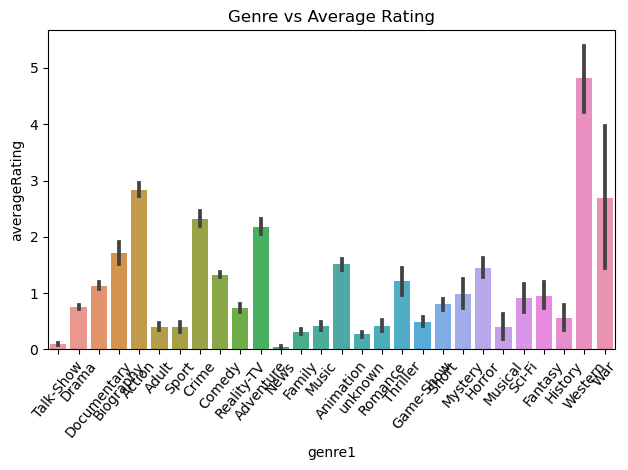

In [180]:
sns.barplot(x=imdb_df['genre1'], y=imdb_df['averageRating'])
plt.xlabel('genre1')
plt.ylabel('averageRating')
plt.title('Genre vs Average Rating')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

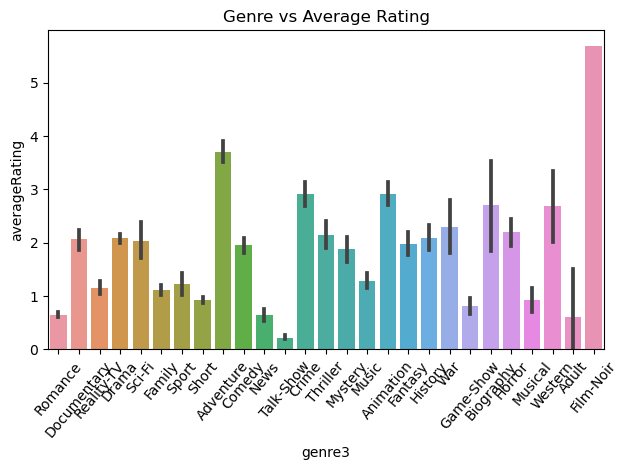

In [181]:
sns.barplot(x=imdb_df['genre2'], y=imdb_df['averageRating'])
plt.xlabel('genre3')
plt.ylabel('averageRating')
plt.title('Genre vs Average Rating')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

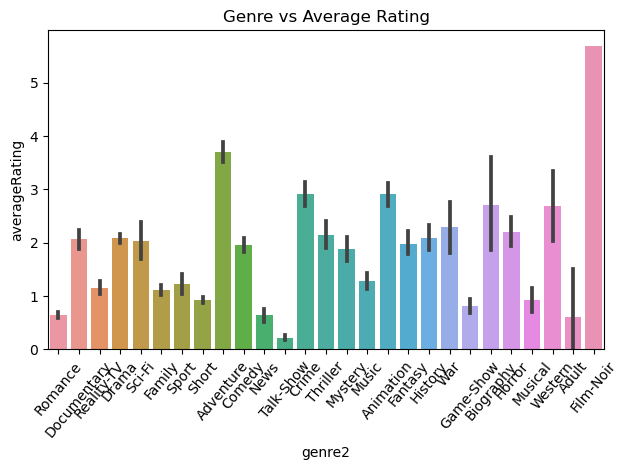

In [182]:
sns.barplot(x=imdb_df['genre2'], y=imdb_df['averageRating'])
plt.xlabel('genre2')
plt.ylabel('averageRating')
plt.title('Genre vs Average Rating')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

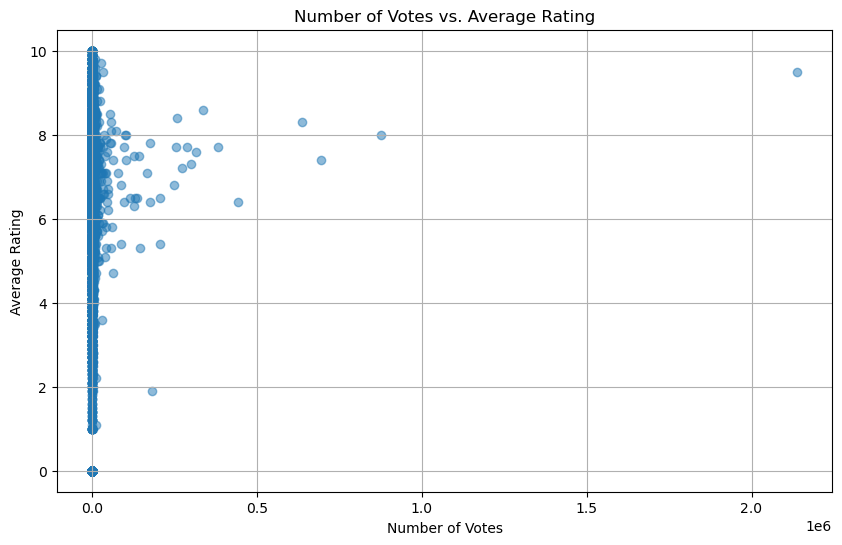

In [183]:
num_votes = imdb_df['numVotes']
avg_rating = imdb_df['averageRating']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(num_votes, avg_rating, alpha=0.5)  # Set alpha to adjust transparency

# Set labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.title('Number of Votes vs. Average Rating')

# Show the plot
plt.grid(True)  # Add grid lines for better readability
plt.show()

In [184]:
# Check the data types of all columns
print(imdb_df.dtypes)

isAdult                   float64
startYear                 float64
endYear                   float64
runtimeMinutes            float64
averageRating             float64
numVotes                  float64
isOriginalTitle           float64
titleLength                 int64
genreCount                  int64
titleType_movie              bool
titleType_short              bool
titleType_tvEpisode          bool
titleType_tvMiniSeries       bool
titleType_tvMovie            bool
titleType_tvShort            bool
titleType_tvSpecial          bool
titleType_video              bool
titleType_videoGame          bool
genre1                     object
genre2                     object
genre3                     object
dtype: object


In [185]:
imdb_df['genre1'].unique()
imdb_df['genre2'].unique()
imdb_df['genre3'].unique()

array([None, 'History', 'Sport', 'Family', 'Short', 'Talk-Show',
       'Romance', 'Animation', 'Music', 'Drama', 'Reality-TV', 'Fantasy',
       'News', 'Mystery', 'Crime', 'Thriller', 'Comedy', 'Sci-Fi', 'War',
       'Horror', 'Biography', 'Musical', 'Western', 'Game-Show',
       'Documentary', 'Adventure', 'Film-Noir'], dtype=object)

In [186]:
imdb_df['genre1'] = imdb_df['genre1'].replace({'unknown': -1, None: 0, 'History': 1, 'Sport' : 2, 'Family': 3 , 'Short': 4, 'Talk-Show': 5,
       'Romance': 6, 'Animation': 7, 'Music': 8, 'Drama': 9, 'Reality-TV': 10, 'Fantasy': 11,
       'News': 12, 'Mystery': 13, 'Crime': 14, 'Thriller': 15, 'Comedy': 16, 'Sci-Fi': 17, 'War': 18,
       'Horror': 19, 'Biography': 20, 'Musical': 21, 'Western': 22, 'Game-Show': 23,
       'Documentary': 24, 'Adventure': 25, 'Film-Noir': 26, 'Action': 27, 'Adult': 28})


imdb_df['genre2'] = imdb_df['genre2'].replace({'unknown': -1, None: 0, 'History': 1, 'Sport' : 2, 'Family': 3 , 'Short': 4, 'Talk-Show': 5,
       'Romance': 6, 'Animation': 7, 'Music': 8, 'Drama': 9, 'Reality-TV': 10, 'Fantasy': 11,
       'News': 12, 'Mystery': 13, 'Crime': 14, 'Thriller': 15, 'Comedy': 16, 'Sci-Fi': 17, 'War': 18,
       'Horror': 19, 'Biography': 20, 'Musical': 21, 'Western': 22, 'Game-Show': 23,
       'Documentary': 24, 'Adventure': 25, 'Film-Noir': 26, 'Action': 27, 'Adult': 28})


imdb_df['genre3'] = imdb_df['genre3'].replace({'unknown': -1, None: 0, 'History': 1, 'Sport' : 2, 'Family': 3 , 'Short': 4, 'Talk-Show': 5,
       'Romance': 6, 'Animation': 7, 'Music': 8, 'Drama': 9, 'Reality-TV': 10, 'Fantasy': 11,
       'News': 12, 'Mystery': 13, 'Crime': 14, 'Thriller': 15, 'Comedy': 16, 'Sci-Fi': 17, 'War': 18,
       'Horror': 19, 'Biography': 20, 'Musical': 21, 'Western': 22, 'Game-Show': 23,
       'Documentary': 24, 'Adventure': 25, 'Film-Noir': 26, 'Action': 27, 'Adult': 28})

imdb_df.head(30)

,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isOriginalTitle,titleLength,genreCount,titleType_movie,...,titleType_tvEpisode,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame,genre1,genre2,genre3
0,0.0,0.0,0.0,44.0,0.0,0.0,1.0,14,1,False,...,True,False,False,False,False,False,False,5,0,0
1,0.0,1983.0,0.0,0.0,0.0,0.0,1.0,13,2,False,...,True,False,False,False,False,False,False,9,6,0
2,0.0,2000.0,0.0,43.0,0.0,0.0,1.0,18,1,False,...,True,False,False,False,False,False,False,24,0,0
3,0.0,2009.0,2010.0,50.0,0.0,0.0,0.0,25,3,False,...,False,False,False,False,False,False,False,20,24,1
4,0.0,2012.0,0.0,41.0,8.4,9.0,1.0,11,3,False,...,True,False,False,False,False,False,False,27,10,2
5,1.0,2016.0,0.0,0.0,0.0,0.0,1.0,24,1,False,...,True,False,False,False,False,False,False,28,0,0
6,0.0,2023.0,0.0,0.0,0.0,0.0,0.0,15,1,False,...,True,False,False,False,False,False,False,9,0,0
7,0.0,2016.0,0.0,17.0,0.0,0.0,1.0,36,1,False,...,True,False,False,False,False,False,False,2,0,0
8,0.0,2023.0,0.0,111.0,0.0,0.0,1.0,21,1,True,...,False,False,False,False,False,False,False,14,0,0
9,0.0,2022.0,0.0,0.0,7.1,7.0,1.0,12,3,False,...,True,False,False,False,False,False,False,16,9,3


In [187]:
imdb_df.to_csv("finalData.csv")